In [2]:
import pickle
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass,field
import plotly.express as px
@dataclass
class Feature_Vector:
    Number_of_tiles: int =10
    Number_of_Tiling:int =10
    State_Dimensions: int=2
    State_Ranges:list= field(default_factory=lambda:[[2,2],[1,1]])
    Number_of_actions:int=3
    
    def __post_init__(self):
        
        self._Empty_Feature_vect=np.zeros((self.State_Dimensions,self.Number_of_Tiling,self.Number_of_tiles,self.Number_of_actions))
        self.Shift_Vect=[(i[1]-i[0])/self.Number_of_tiles/self.Number_of_Tiling for i in self.State_Ranges]
        self._Base_Shift_Vect=np.array([2*i+1 for i in range(self.Number_of_Tiling)]) 
        Temp=np.ndarray((self.State_Dimensions,self.Number_of_Tiling,self.Number_of_tiles-1),dtype=float)
        for i in range(self.State_Dimensions):
            for j in range(self.Number_of_Tiling):
                Temp[i,j,:]=np.linspace(self.State_Ranges[i][0]+self._Base_Shift_Vect[j]*(i+1)*self.Shift_Vect[i],self.State_Ranges[i][1]+self._Base_Shift_Vect[j]*(i+1)*self.Shift_Vect[i],num=self.Number_of_tiles-1)
        self.bin=Temp.copy()
    
    def Get_Feature_Vector(self,State_Action):
        Index=np.zeros((self.State_Dimensions*self.Number_of_Tiling,4),dtype=int)
        Index[...,-1]=State_Action[1]
        Index[...,1]=np.tile(np.arange(self.Number_of_Tiling),self.State_Dimensions)
        Index[...,0]=np.repeat(range(self.State_Dimensions),self.Number_of_Tiling)
        Index[...,2]=np.hstack(np.sum(np.subtract(self.bin,np.array(State_Action[0])[:,np.newaxis,np.newaxis])<0,axis=2))        
        return tuple(Index.T)


In [3]:
with open("Sim_Res_2_A 10",'rb') as f:
    Results=pickle.load(f)

In [4]:
Extract=np.zeros((20,20,20,10))


In [5]:
TD={"Agent1":[],
    "Glucose":[],
    "Starch":[],
    "Action":[],
    "Value":[]
    
   }
for i in range(Extract.shape[0]):
    print(i)
    for j in range(Extract.shape[1]):
        for k in range(Extract.shape[2]):
            for l in range(Extract.shape[3]):
            
                TD["Agent1"].append(np.linspace(0,100,20)[i])
                TD["Glucose"].append(np.linspace(0,200,20)[j])
                TD["Starch"].append(np.linspace(0,10,20)[k])
                TD["Action"].append(l)
                TD["Value"].append(np.sum([np.sum(Results[c][0][0].W[Results[0][0][0].Features.Get_Feature_Vector(((np.linspace(0,100,20)[i],np.linspace(0,200,20)[j],np.linspace(0,10,20)[k]),l))])for c in range(8)]))
                    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [6]:
Table=pd.DataFrame(TD)

<AxesSubplot:>

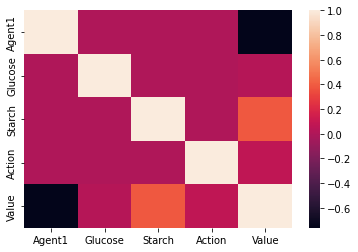

In [7]:
sns.heatmap(Table.corr())

In [8]:
Data_Table={"Low":Table[(Table["Starch"]==np.linspace(0,10,20)[0])].reset_index(drop=True).copy(),
           "Medium":Table[(Table["Starch"]==np.linspace(0,10,20)[10])].reset_index(drop=True).copy(),
            "High":Table[(Table["Starch"]==np.linspace(0,10,20)[19])].reset_index(drop=True).copy(),
           }


In [9]:
Data_Table_Optimal={"Low":Data_Table["Low"].loc[Data_Table["Low"].groupby(["Agent1","Glucose"])["Value"].idxmax()],
                    "Medium":Data_Table["Medium"].loc[Data_Table["Medium"].groupby(["Agent1","Glucose"])["Value"].idxmax()],
                   "High":Data_Table["High"].loc[Data_Table["High"].groupby(["Agent1","Glucose"])["Value"].idxmax()]
}


In [22]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=Data_Table_Optimal["Low"]['Value'].to_numpy().reshape(20,20,order="F"), x=np.linspace(0,100,20), y=np.linspace(0,200,20))],
               )
fig.update_layout(scene = dict(
                    xaxis_title='Agent[C]',
                    yaxis_title='Glucose[C]',
                    zaxis_title='Value'),
                    width=800,
                    margin=dict(r=20, b=10, l=10, t=10)),


fig.show()


In [33]:
fig = go.Figure(data=[go.Scatter3d(x=Data_Table["Low"]["Agent1"], y=Data_Table["Low"]["Glucose"],z=Data_Table["Low"]["Value"],mode='markers',
                                       marker=dict(
        size=5,
        color=Table["Action"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1,
        colorbar=dict(thickness=10,title="Action")),
        text = Data_Table["Low"]["Action"]
)])

In [34]:
fig.update_layout(scene = dict(
                    xaxis_title='Agent[C]',
                    yaxis_title='Glucose[C]',
                    zaxis_title='Q_value'),
                    width=600,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.write_html("3dplots_Low.html")

In [28]:
fig.show()